<ipython-input-6-d3178d1fd68f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['Cluster'] = kmeans_labels


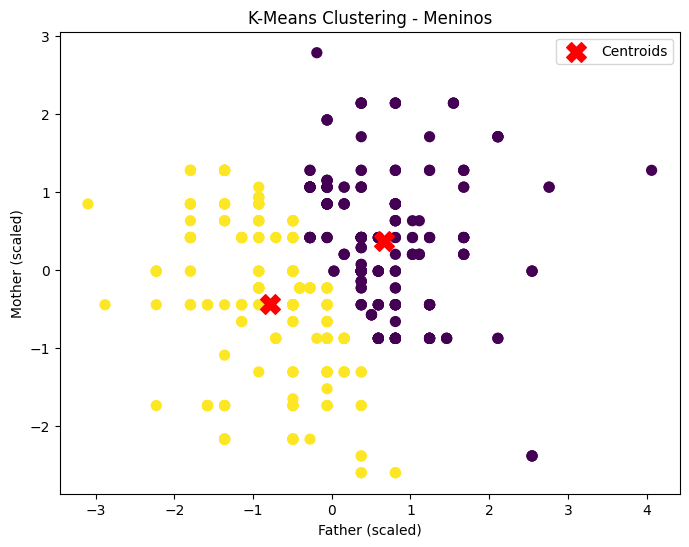

Distribuição de Clusters para Meninos:
    Cluster  Counts
0        0     259
1        1     222


<ipython-input-6-d3178d1fd68f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['Cluster'] = kmeans_labels


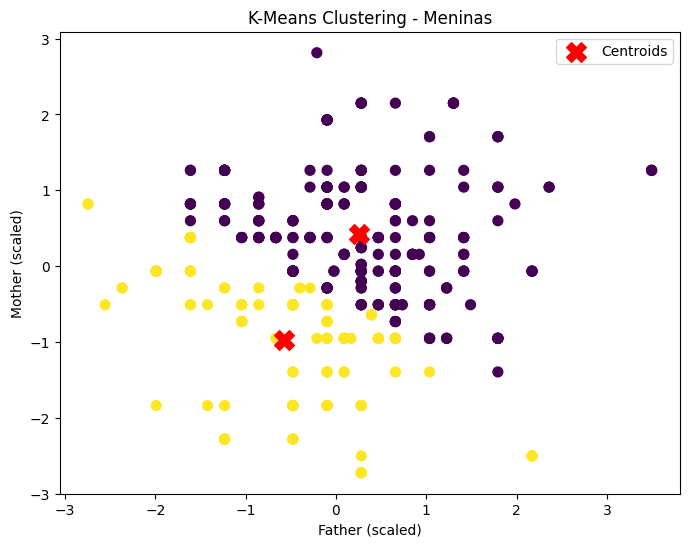

Distribuição de Clusters para Meninas:
    Cluster  Counts
0        0     316
1        1     137


In [ ]:
# NOMES : EMIR BRAZ , SAMADY CORREA
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt


data = pd.read_csv('/content/sample_data/GaltonFamilies.csv')

# Codificar o gênero como numérico (0 = female, 1 = male)
data['gender_encoded'] = LabelEncoder().fit_transform(data['gender'])

# Separar os dados por gênero
boys = data[data['gender'] == 'male']
girls = data[data['gender'] == 'female']

# Função para aplicar o K-Means e plotar resultados
def apply_kmeans_and_plot(data_subset, title):
    # Selecionar as features
    features = data_subset[['father', 'mother']]

    # Normalizar os dados
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # Aplicar o K-Means
    kmeans = KMeans(n_clusters=2, random_state=42)
    kmeans_labels = kmeans.fit_predict(features_scaled)

    # Adicionar os rótulos ao dataframe
    data_subset['Cluster'] = kmeans_labels

    # Plotar os resultados
    plt.figure(figsize=(8, 6))
    plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=kmeans_labels, cmap='viridis', s=50)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids', marker='X')
    plt.title(f"K-Means Clustering - {title}")
    plt.xlabel("Father (scaled)")
    plt.ylabel("Mother (scaled)")
    plt.legend()
    plt.show()

    # Exibir a composição dos clusters
    cluster_distribution = data_subset.groupby('Cluster').size().reset_index(name='Counts')
    print(f"Distribuição de Clusters para {title}:\n", cluster_distribution)

# Aplicar o K-Means e plotar para meninos
apply_kmeans_and_plot(boys, "Meninos")

# Aplicar o K-Means e plotar para meninas
apply_kmeans_and_plot(girls, "Meninas")
